## 1) Problem Statement :- Predicting Diabetes using Logistic Regression

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## 2) Loade dataset :-

In [2]:
data=pd.read_csv(r"C:\Users\jadha\Downloads\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 3) Data Preprocessing :-

In [3]:
data.shape

(768, 9)

 The 'diabetes' dataset contains 768 rows and 9 columns.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

For our logistic regression Model, we're using the following columns:
 - Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
 - Target variable: Outcome (Oure target variable is 0 & 1)


## 4) Sampling :- Divide data into Train & Test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_train,data_test = train_test_split(data,test_size=.2)

#### Define the data into x & y 

In [9]:
data_train_x = data_train.iloc[:,0:-1]
data_train_y = data_train.iloc[:,-1]

In [10]:
data_test_x = data_test.iloc[:,0:-1]
data_test_y = data_test.iloc[:,-1]

## 5) Model Building:-

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()

In [14]:
lr.fit(data_train_x,data_train_y)

C:\Users\jadha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Prediction

In [16]:
pred = lr.predict(data_test_x)
pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(data_test_y,pred)
cm

array([[95,  8],
       [19, 32]], dtype=int64)

## Model Evaluation :-

### Evaluation parameters in Linear Regression model are :-
 a) Accuracy.
 b) Tpr/Recall.
 c) Precission.
 d) F1 Ratio.
 e) Auroc Curve.

In [20]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data_test_y,pred)*100

82.46753246753246

In [21]:
# tpr/Recall
from sklearn.metrics import recall_score
recall_score(data_test_y,pred)*100

62.745098039215684

In [22]:
# precission
from sklearn.metrics import precision_score
precision_score(data_test_y,pred)*100


80.0

In [23]:
# f1 ratio
from sklearn.metrics import f1_score
f1_score(data_test_y,pred)*100

70.32967032967032

#### Conclusion:-
According the evaluating parameters we get to know that our model is good. Higher the Accuracy better the model. Higher the precission better the model.

In [24]:
pred_proba = lr.predict_proba(data_test_x)
pred_proba

array([[0.3180047 , 0.6819953 ],
       [0.68667874, 0.31332126],
       [0.70134567, 0.29865433],
       [0.54533113, 0.45466887],
       [0.5706273 , 0.4293727 ],
       [0.3686115 , 0.6313885 ],
       [0.74220187, 0.25779813],
       [0.15339737, 0.84660263],
       [0.11552354, 0.88447646],
       [0.17391149, 0.82608851],
       [0.62629794, 0.37370206],
       [0.32460742, 0.67539258],
       [0.15565831, 0.84434169],
       [0.72422985, 0.27577015],
       [0.85654172, 0.14345828],
       [0.92649809, 0.07350191],
       [0.84941694, 0.15058306],
       [0.80205105, 0.19794895],
       [0.90772652, 0.09227348],
       [0.81434803, 0.18565197],
       [0.84119614, 0.15880386],
       [0.67348007, 0.32651993],
       [0.39012916, 0.60987084],
       [0.93948504, 0.06051496],
       [0.95100052, 0.04899948],
       [0.73598266, 0.26401734],
       [0.98388874, 0.01611126],
       [0.44030232, 0.55969768],
       [0.63284118, 0.36715882],
       [0.28968109, 0.71031891],
       [0.

In [25]:
pred_proba[:,1]

array([0.6819953 , 0.31332126, 0.29865433, 0.45466887, 0.4293727 ,
       0.6313885 , 0.25779813, 0.84660263, 0.88447646, 0.82608851,
       0.37370206, 0.67539258, 0.84434169, 0.27577015, 0.14345828,
       0.07350191, 0.15058306, 0.19794895, 0.09227348, 0.18565197,
       0.15880386, 0.32651993, 0.60987084, 0.06051496, 0.04899948,
       0.26401734, 0.01611126, 0.55969768, 0.36715882, 0.71031891,
       0.43541993, 0.8446104 , 0.25619878, 0.09680296, 0.05750759,
       0.29159626, 0.30763516, 0.09999145, 0.78797571, 0.41763163,
       0.10656272, 0.25700619, 0.11714579, 0.14700434, 0.07101244,
       0.95428537, 0.21446418, 0.08814458, 0.10973701, 0.27095192,
       0.11107703, 0.19957111, 0.06078863, 0.12126506, 0.87229779,
       0.46927042, 0.12730685, 0.59960882, 0.21711155, 0.16898285,
       0.13066493, 0.69143781, 0.04594038, 0.27706645, 0.23568181,
       0.72743766, 0.76777398, 0.90406458, 0.14206724, 0.05653633,
       0.72518121, 0.01274086, 0.40395   , 0.13324832, 0.05126

In [26]:
#curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
roc_auc_score(data_test_y,pred)*100

77.48905387397677

In [28]:
# plot graph
fpr,tpr,ther = roc_curve(data_test_y,pred_proba[:,1])

In [29]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'auroc is 72.8301')

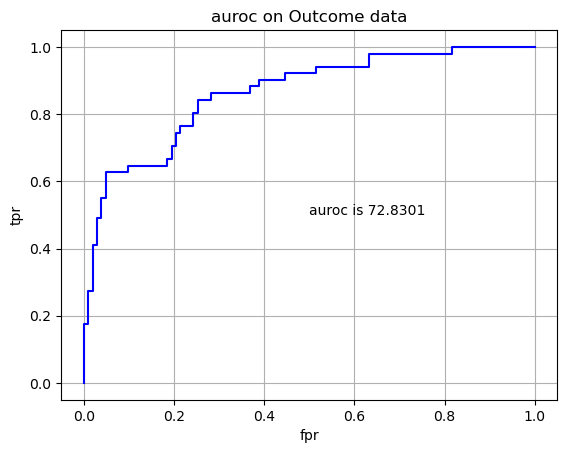

In [30]:
plt.plot(fpr,tpr,color="b")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('auroc on Outcome data')
plt.grid()
plt.text(x=.5,y=.5,s='auroc is 72.8301')

#### The model achieves an accuracy of 82% and a precision of 80%, indicating good overall performance and reliable identification of diabetic cases. However, with a recall of 62%, there's potential to improve the model's ability to capture all instances of diabetes.